In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/cybersecurity-intrusion-detection-dataset/cybersecurity_intrusion_data.csv')

In [3]:
df.shape

(9537, 11)

In [4]:
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [5]:
df.dtypes

session_id              object
network_packet_size      int64
protocol_type           object
login_attempts           int64
session_duration       float64
encryption_used         object
ip_reputation_score    float64
failed_logins            int64
browser_type            object
unusual_time_access      int64
attack_detected          int64
dtype: object

In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_cols, numerical_cols 

(['session_id', 'protocol_type', 'encryption_used', 'browser_type'],
 ['network_packet_size',
  'login_attempts',
  'session_duration',
  'ip_reputation_score',
  'failed_logins',
  'unusual_time_access',
  'attack_detected'])

In [7]:
df.isnull().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
df[['encryption_used']] = imputer.fit_transform(df[['encryption_used']])

In [9]:
df.isnull().sum()

session_id             0
network_packet_size    0
protocol_type          0
login_attempts         0
session_duration       0
encryption_used        0
ip_reputation_score    0
failed_logins          0
browser_type           0
unusual_time_access    0
attack_detected        0
dtype: int64

In [10]:
df = df.drop(columns="session_id", axis=1)

Text(0.5, 1.0, 'Protocol Types')

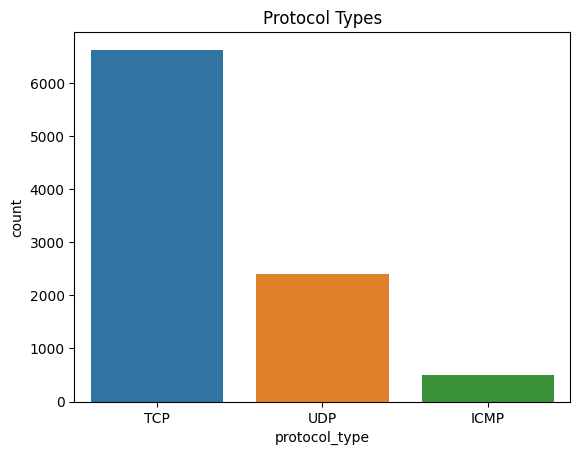

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = df['protocol_type'])
plt.title("Protocol Types")

Text(0.5, 1.0, 'encryptions used')

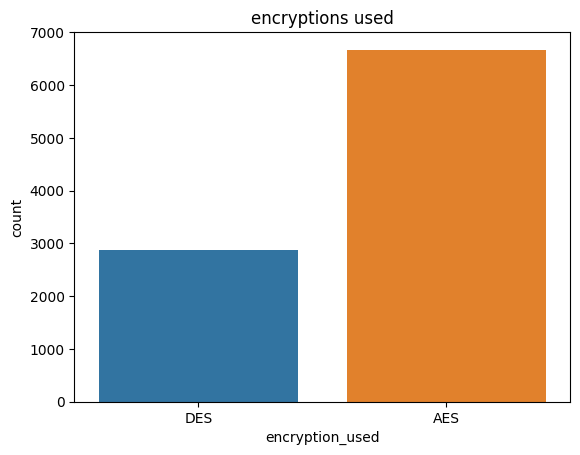

In [12]:
sns.countplot(x = df['encryption_used'])
plt.title("encryptions used")

Text(0.5, 1.0, 'Browsers used')

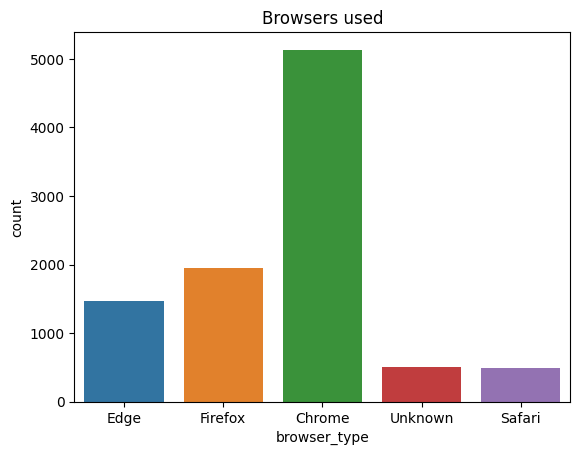

In [13]:
sns.countplot(x = df['browser_type'])
plt.title("Browsers used")

<Axes: xlabel='attack_detected', ylabel='count'>

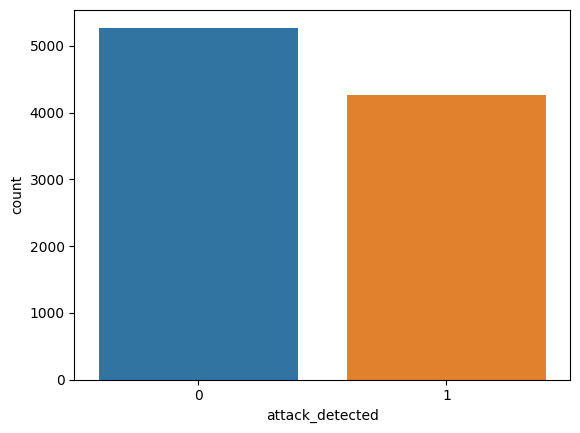

In [14]:
sns.countplot(x = df['attack_detected'])

<Axes: xlabel='failed_logins', ylabel='count'>

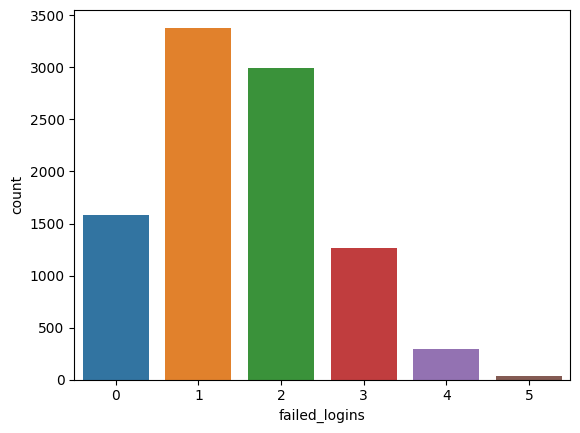

In [15]:
sns.countplot(x = df['failed_logins'])